In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error,accuracy_score,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [2]:
insurance3 = pd.read_csv('../input/sample-insurance-claim-prediction-dataset/insurance3r2.csv')

Let's load and look at the data

In [3]:
insurance3.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [4]:
insurance3.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


We are now looking for any inaccuracies in the data

In [5]:
print("Missing values in insurance3 data")
missing=insurance3.isnull().sum()
missing[missing>0]

Missing values in insurance3 data


Series([], dtype: int64)

We define features for an initial fit and feel for the data

In [6]:
insurance3.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [7]:
features = ['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'insuranceclaim']

In [8]:
X = insurance3[features]
y = insurance3.charges

In [9]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.params

const            -22480.343967
age                 274.453216
sex                -164.773701
bmi                 563.454925
steps                 0.706854
children            161.894199
smoker            25496.644757
region             -415.929711
insuranceclaim    -1262.139475
dtype: float64

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     531.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:30   Log-Likelihood:                -13518.
No. Observations:                1338   AIC:                         2.705e+04
Df Residuals:                    1329   BIC:                         2.710e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.248e+04   1702.273    -13.

This OLS model is only an okay predictor of the data, with an R-squared of .762 and some other underlying issues

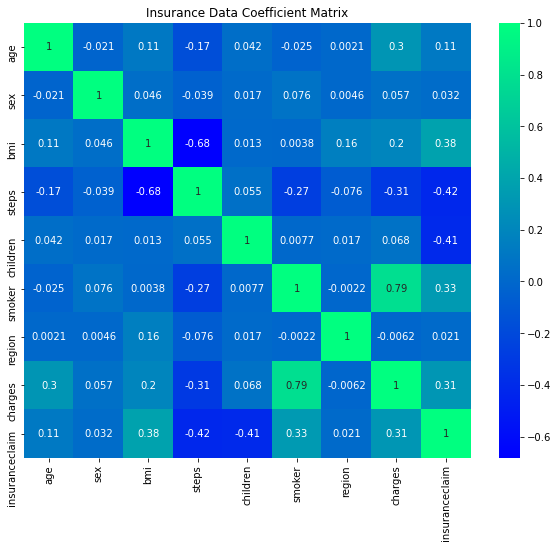

In [11]:
ins3CoeffMatrix = insurance3.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data=ins3CoeffMatrix, cmap='winter', annot=True)
plt.title('Insurance Data Coefficient Matrix')
plt.show()

Here we see some slight collinearity between steps and BMI. On the positive side, we can already see smoker and charges positively correlated, which we might have expected 

Let's plot the data and try to pick out some trends

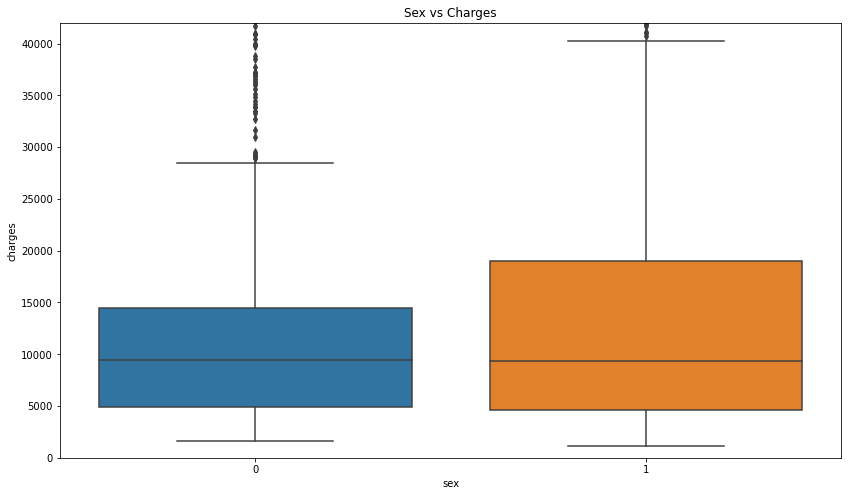

In [12]:
df = insurance3[['sex', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.ylim((0, 42000))
plt.show()

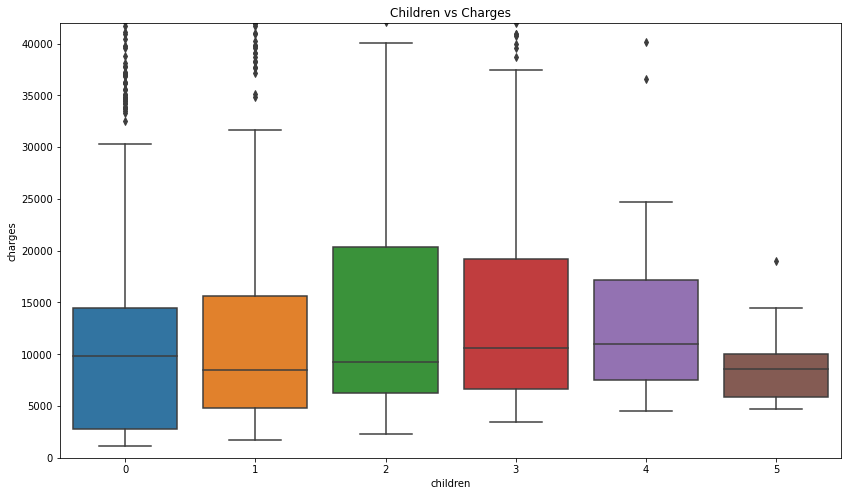

In [13]:
df = insurance3[['children', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.ylim((0, 42000))
plt.show()

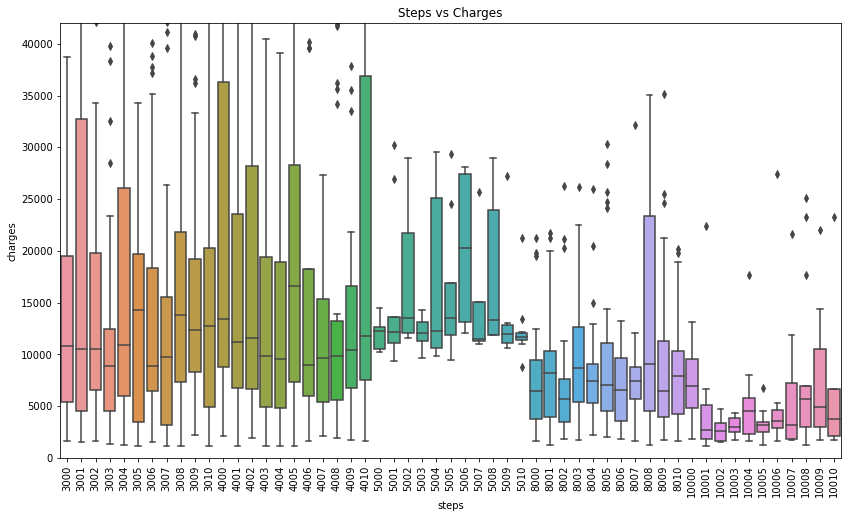

In [14]:
df = insurance3[['steps', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='steps', y='charges', data=df)
plt.title('Steps vs Charges')
plt.ylim((0, 42000))
plt.xticks(rotation=90)
plt.show()

In [15]:
xticks = [0, 1, 2, 3]
xlabels = ['Northeast', 'Northwest', 'Southeast', 'Southwest']

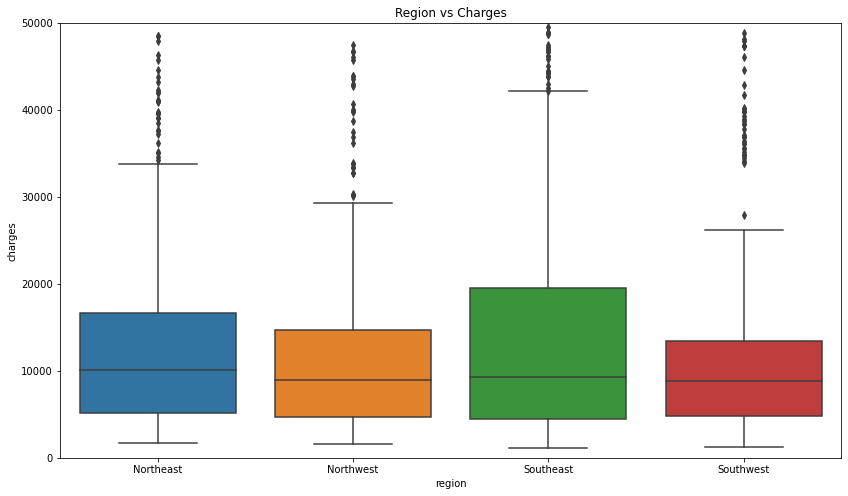

In [16]:
df = insurance3[['region', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.ylim((0, 50000))
plt.xticks(xticks, xlabels)
plt.show()

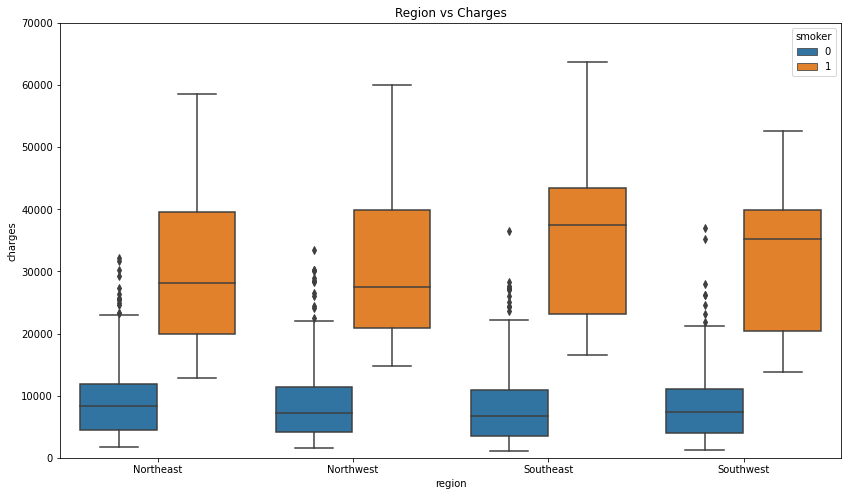

In [17]:
df = insurance3[['region', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='region', y='charges', data=df, hue=insurance3.smoker)
plt.title('Region vs Charges')
plt.ylim((0, 70000))
plt.xticks(xticks, xlabels)
plt.show()

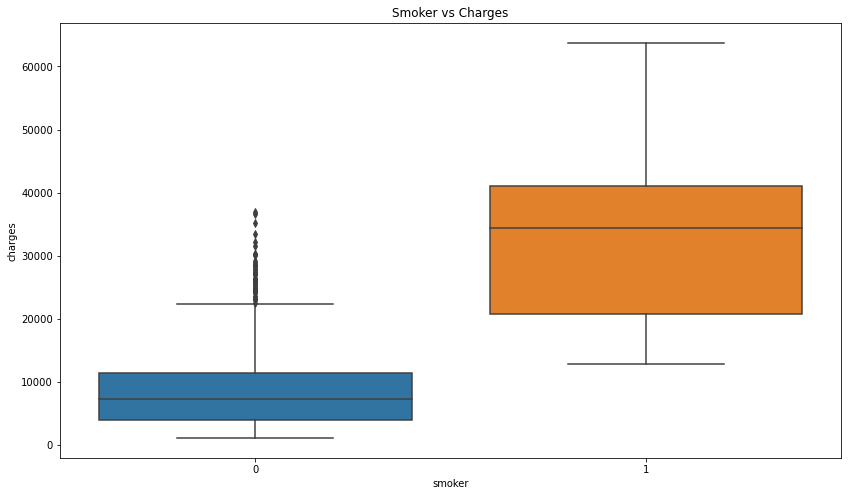

In [18]:
df = insurance3[['smoker', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

In [19]:
NS = insurance3[insurance3.smoker == 0]
S = insurance3[insurance3.smoker == 1]
NSmean = NS.charges.mean()
Smean = S.charges.mean()
print('Non-Smoker Mean: ' , NSmean)
print('Smoker Mean:' , Smean)
print('Increased Percentage: ' + str(round(((Smean - NSmean)/NSmean)*100,2)) + '%')

Non-Smoker Mean:  8434.268297856199
Smoker Mean: 32050.23183153285
Increased Percentage: 280.0%


A quick calculation about what we ultimately want to know

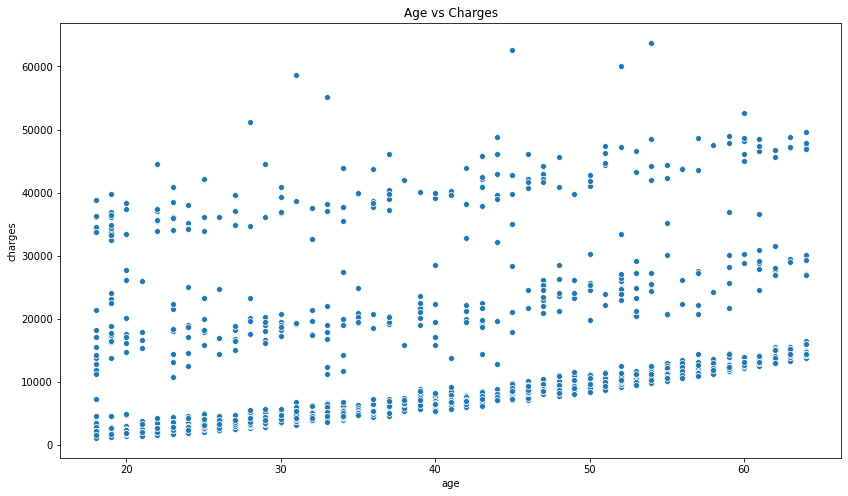

In [20]:
df = insurance3[['age', 'charges']]
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

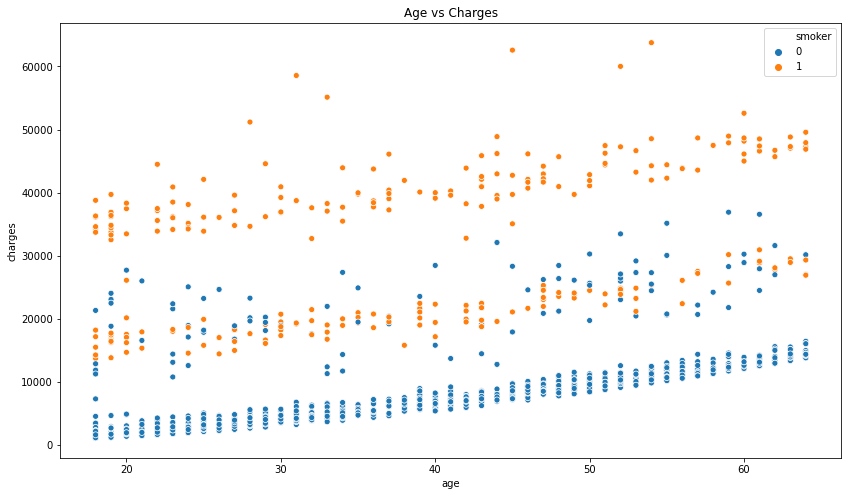

In [21]:
df = insurance3[['age', 'charges']]
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=df, hue=insurance3.smoker)
plt.title('Age vs Charges')
plt.show()

Let's attempt to isolate this middle group and see if we can't find another contributing factor

In [22]:
df = np.where(((insurance3.charges > 10000) & (insurance3.charges < 30000) & (insurance3.age < 40)), 1, 0)
df2 = np.where(((insurance3.age >= 40) & (insurance3.age < 50) & (insurance3.charges > 12000) & (insurance3.charges < 35000)), 1, 0)
df3 = np.where((insurance3.age >= 50) & (insurance3.charges > 18000) & (insurance3.charges < 40000), 1, 0)
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)
df3 = pd.DataFrame(df3)

In [23]:
df4 = df + df2 + df3


In [24]:
insurance3['question'] = df4

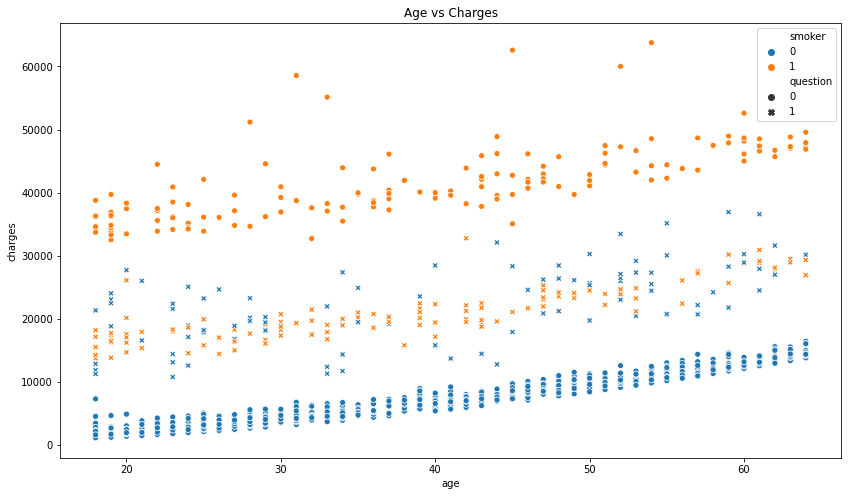

In [25]:
df = insurance3[['age', 'charges']]
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=df, hue=insurance3.smoker, style=insurance3.question)
plt.title('Age vs Charges')
plt.show()

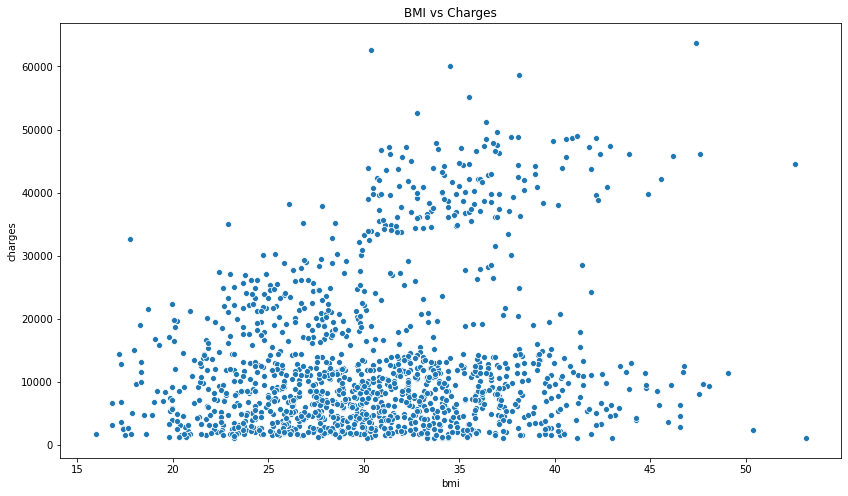

In [26]:
df = insurance3[['bmi', 'charges']]
plt.figure(figsize = (14,8))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

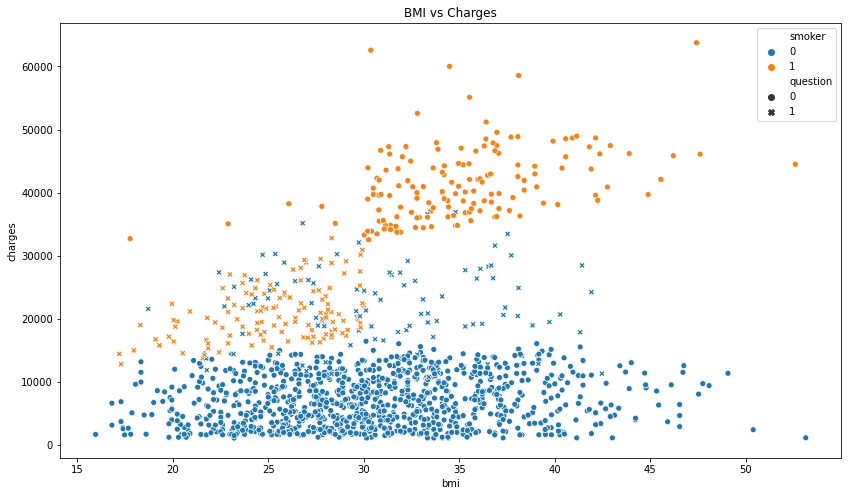

In [27]:
df = insurance3[['bmi', 'charges']]
plt.figure(figsize = (14,8))
sns.scatterplot(x='bmi', y='charges', data=df, hue=insurance3.smoker, style=insurance3.question)
plt.title('BMI vs Charges')
plt.show()

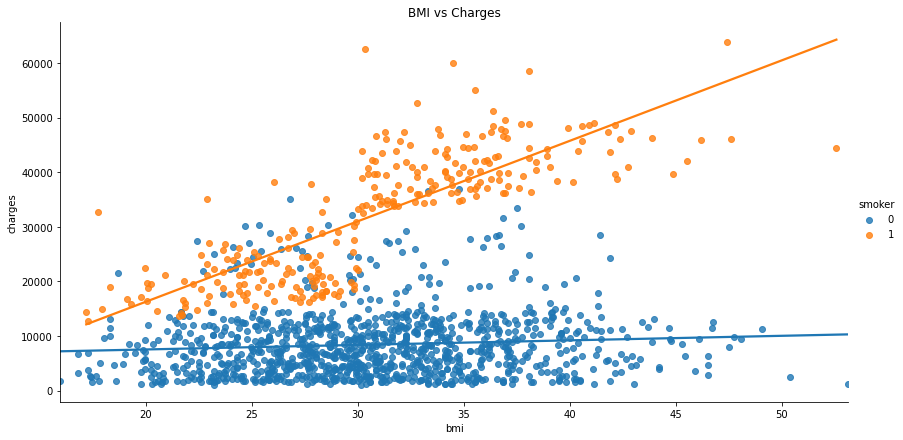

In [28]:
df = insurance3[['bmi', 'charges', 'smoker']]
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', ci=None, height=6, aspect=2)
ax = plt.gca()
ax.set_title("BMI vs Charges")
plt.show()

Okay, well we've separated the "middle group" but I'm not sure if it's very helpful right now. Let's move forward

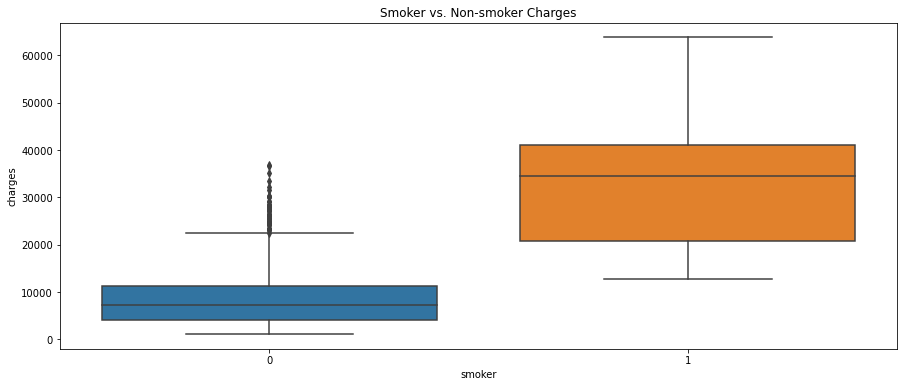

In [29]:
df = insurance3[['smoker', 'charges']]
plt.figure(figsize=(15,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Non-smoker Charges')
plt.show()

At this point, we know we want to drop some things. We remove steps to avoid overfitting, and we have dropped insuranceclaim as there was insufficient evidence for what it really meant and how it was sourced. Now, we need to get the dataframe for correlation into something we can work with

In [30]:
ins3bar = ins3CoeffMatrix.iloc[-2]
ins4bar = ins3bar.drop('charges')
ins4bar = ins4bar.sort_values(ascending=False)
ins4bar = ins4bar.reset_index()
ins4bar = ins4bar.rename({'index':'labels'}, axis='columns')
ins4bar.labels

0            smoker
1    insuranceclaim
2               age
3               bmi
4          children
5               sex
6            region
7             steps
Name: labels, dtype: object

In [31]:
xticks = ins4bar.index
xlabels = ins4bar.labels

<Figure size 432x288 with 0 Axes>

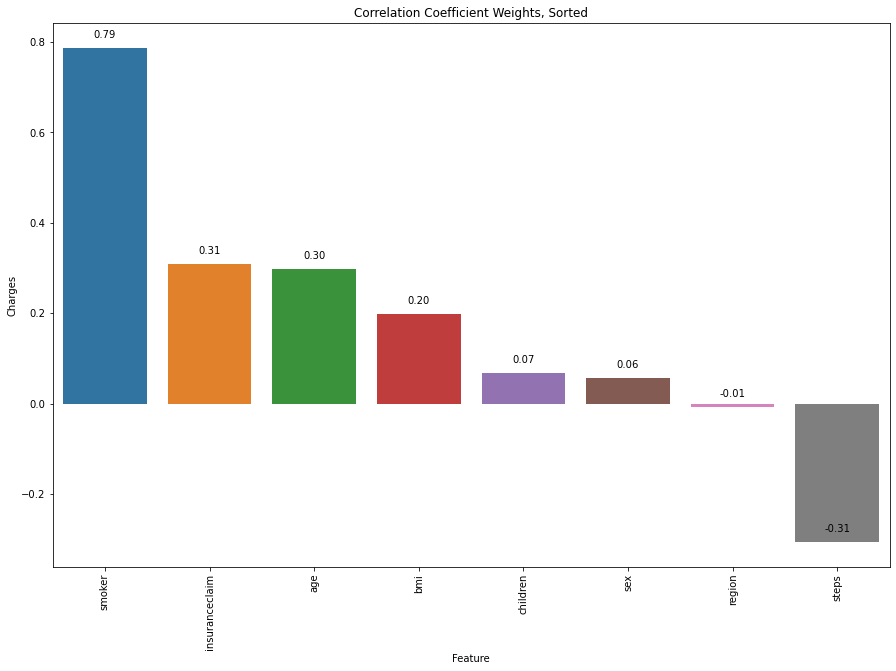

In [32]:
plt.clf()
plt.figure(figsize=(15,10))
xs = ins4bar.index
ys = ins4bar.charges
sns.barplot(xs, ys)


for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(xticks, xlabels, rotation=90)
plt.title('Correlation Coefficient Weights, Sorted')
plt.ylabel('Charges')
plt.xlabel('Feature')
plt.show()

Time to make and test models with the dropped variables

In [33]:
model_features = features[:3] + features[4:-1]


In [34]:
X = insurance3[model_features]
y = insurance3.charges

In [35]:
modelX = sm.add_constant(X)
model = sm.OLS(y,modelX).fit()
linScore = round(model.rsquared, 3)
model.params

const      -11815.452321
age           257.288075
sex          -131.110580
bmi           332.570132
children      479.369394
smoker      23820.434123
region       -353.640017
dtype: float64

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:40   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0

In [37]:
"""Now, we make some residual columns so that we can plot the data."""

'Now, we make some residual columns so that we can plot the data.'

We can see that we are no longer getting a warning about collinearity, which is great! Let's create some residuals in a column for plotting later

In [38]:
insurance3['linear_pred'] = model.predict(modelX)
insurance3['linear_resid'] = insurance3.charges - model.predict(modelX)

We are about to use a machine learning model, Random Forests, on this dataset. To do so, we need to separate the data into training and test sets of x (our features) and y (our target). We then apply the model

In [39]:
train_x,val_x,train_y,val_y=train_test_split(X,y,train_size=0.8,test_size=0.2)

In [40]:
RFRmodel=RandomForestRegressor(random_state=1)
RFRmodel.fit(train_x,train_y)
RFRpred=RFRmodel.predict(val_x)
print("Mean absolute error:",mean_absolute_error(val_y,RFRpred))
print("Model score:",RFRmodel.score(val_x,val_y))

Mean absolute error: 2705.014998258998
Model score: 0.8195966420884722


In [41]:
rfrScore = round(r2_score(val_y,RFRpred),3)
print("R-squared: "+str(rfrScore))

R-squared: 0.82


In [42]:
feature_importances = pd.DataFrame(RFRmodel.feature_importances_,
                                   index = train_x.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
smoker,0.619102
bmi,0.202661
age,0.134630
children,0.022876
region,0.015453
sex,0.005278


More residuals!

In [43]:
insurance3['rfr_resid'] = insurance3.charges - RFRmodel.predict(X)
insurance3['rfr_pred'] = RFRmodel.predict(X)

Time to validate our models

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


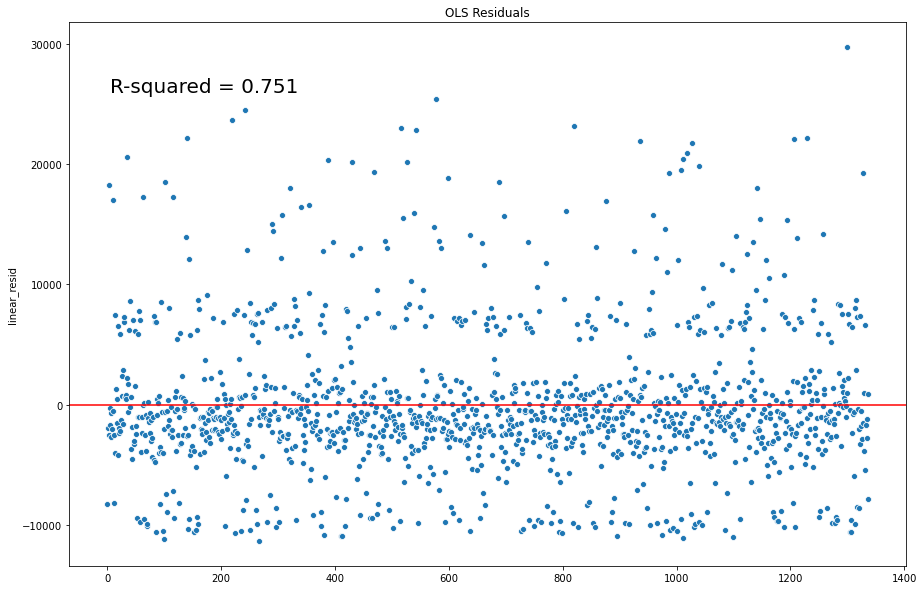

In [44]:
plt.figure(figsize = (15,10))
plt.text(4,26000,'R-squared = '+str(linScore), size=20) #HOW TO GET A R2 at a Point
ax1 = plt.subplot()
ax1.axhline(0, ls='solid', color='red')
sns.scatterplot(x=insurance3.index, y=insurance3.linear_resid, ax=ax1)
plt.title('OLS Residuals')
plt.show()

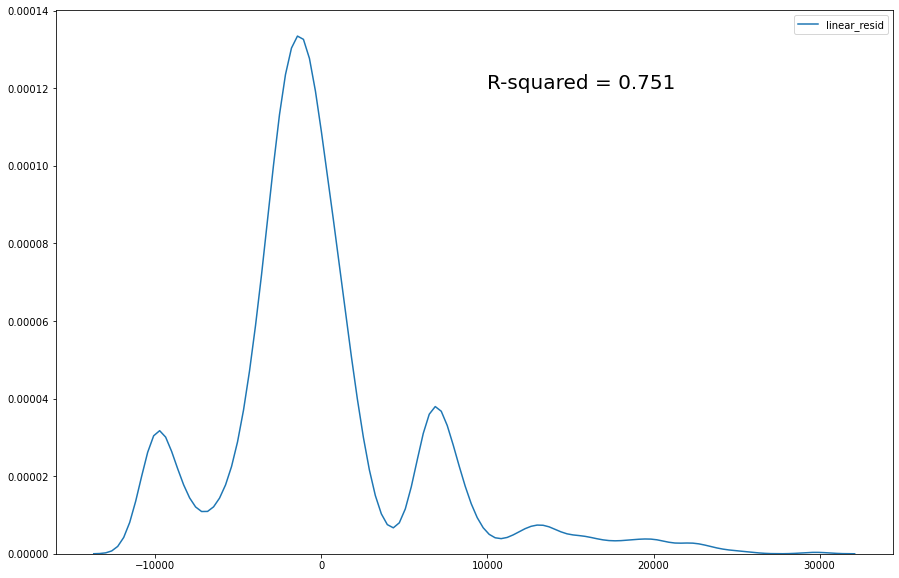

In [45]:
df = insurance3.linear_resid
plt.figure(figsize = (15,10))
plt.text(10000,.00012,'R-squared = '+str(linScore), size=20) #HOW TO GET A R2 at a Point
sns.kdeplot(data=df)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


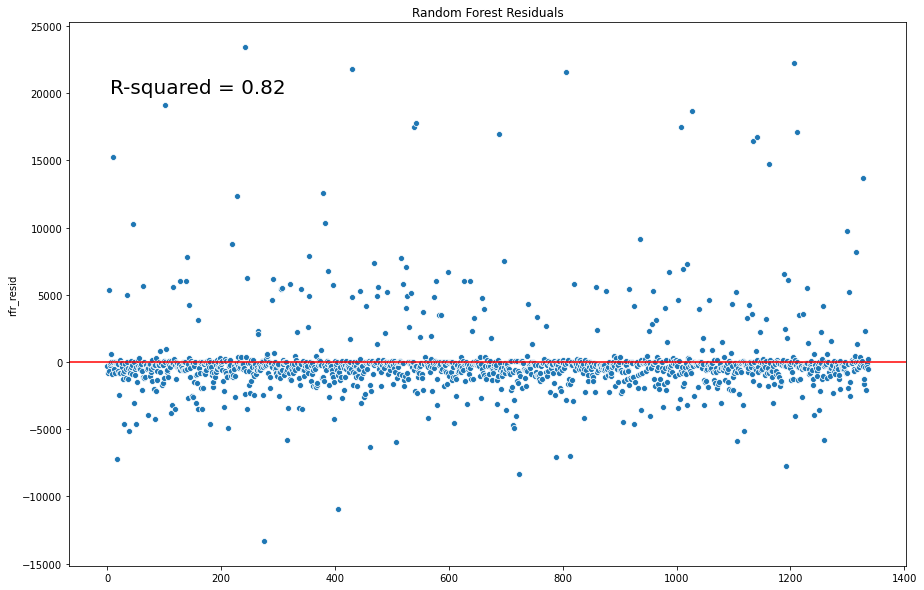

In [46]:
plt.figure(figsize = (15,10))
plt.text(4,20000,'R-squared = '+str(rfrScore), size=20) #HOW TO GET A R2 at a Point
ax1 = plt.subplot()
ax1.axhline(0, ls='solid', color='red')
sns.scatterplot(x=insurance3.index, y=insurance3.rfr_resid, ax=ax1)
plt.title('Random Forest Residuals')
plt.show()

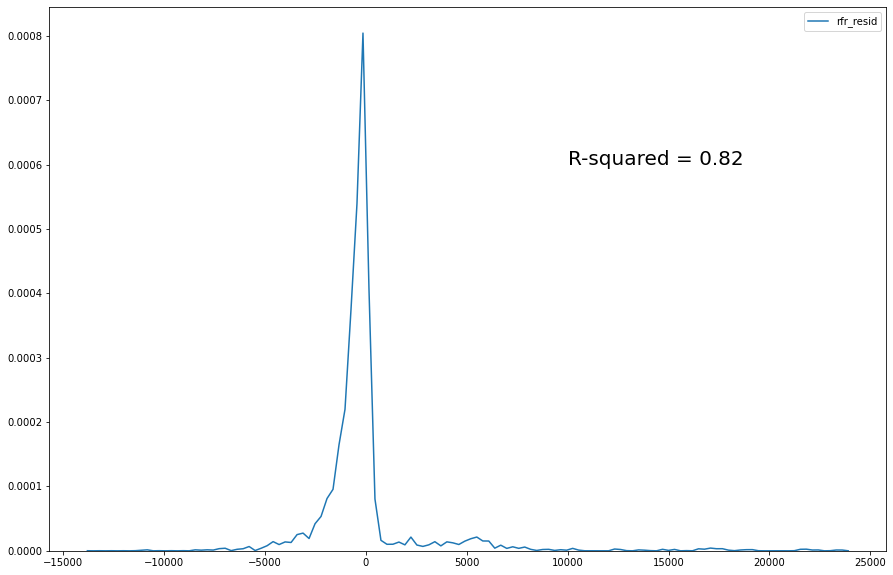

In [47]:
df = insurance3.rfr_resid
plt.figure(figsize = (15,10))
plt.text(10000,.0006,'R-squared = '+str(rfrScore), size=20) #HOW TO GET A R2 at a Point
sns.kdeplot(data=df)
plt.show()

Let's try to do some work here to discover anything hidden in sex, which was where I was originally hoping to find an insight

In [48]:
maleData = insurance3[insurance3.sex == 1]
femaleData = insurance3[insurance3.sex == 0]

In [49]:
nonSmokerMale = maleData[maleData.smoker == 0]
smokerMale = maleData[maleData.smoker == 1]

In [50]:
nonSmokerFemale = femaleData[femaleData.smoker == 0]
smokerFemale = femaleData[femaleData.smoker == 1]

In [51]:
pctFemales = len(femaleData) / len(insurance3)
print("Percentage of Females Represented:" + str(pctFemales))

Percentage of Females Represented:0.4947683109118087


In [52]:
smokerTotHelper = (len(smokerMale)+len(smokerFemale))
pctSmokers = round((smokerTotHelper / len(insurance3))*100,2)
pctMaleSmokers = round((len(smokerMale) / smokerTotHelper)*100,2)
pctFemaleSmokers = round((len(smokerFemale) / smokerTotHelper)*100,2)
diffFemaleSmokers = round((pctFemaleSmokers - pctMaleSmokers),2)
maleIncLikely = round((-1*diffFemaleSmokers / pctFemaleSmokers)*100,2)


print("Percentage of Smokers: " + str(pctSmokers) + "%")
print("Percentage of Male Smokers: " + str(pctMaleSmokers) + "%")
print("Percentage of Female Smokers: " + str(pctFemaleSmokers) + "%")
print("Difference Female Smokers: " + str(diffFemaleSmokers) + "%")
print("Increased Likelihood Male Smoker: " + str(maleIncLikely) + "%")

Percentage of Smokers: 20.48%
Percentage of Male Smokers: 58.03%
Percentage of Female Smokers: 41.97%
Difference Female Smokers: -16.06%
Increased Likelihood Male Smoker: 38.27%


In [53]:
NSMaleCharges = nonSmokerMale.charges.median()
SMaleCharges = smokerMale.charges.median()
NSFemaleCharges = nonSmokerFemale.charges.median()
SFemaleCharges = smokerFemale.charges.median()
weightedMale = (NSMaleCharges * (1-(pctMaleSmokers/100)) + SMaleCharges * (pctMaleSmokers/100))
weightedFemale = (NSFemaleCharges * (1-(pctFemaleSmokers/100)) + SFemaleCharges * (pctFemaleSmokers/100))
print('Weighted Male Cost: $' + str(round(weightedMale,2)))
print('Weighted Female Cost: $' + str(round(weightedFemale, 2)))
print("How Much Cheaper is the 'Expected Value' of a Woman: $" + str(round(weightedMale - weightedFemale, 2)))

Weighted Male Cost: $23872.07
Weighted Female Cost: $16583.67
How Much Cheaper is the 'Expected Value' of a Woman: $7288.4


Okay, some interesting ideas there. Let's look at smoking and regionality

In [54]:
output = []
for reg in range(0,4):
    regionN = insurance3[insurance3.region == reg]
    regionAvg = round(regionN.charges.mean(),2)
    regionSmoker = regionN[regionN.smoker == 1]
    pctSmoker = round((len(regionSmoker) / len(regionN))*100,2)
    output.append((pctSmoker, regionAvg))
output = pd.DataFrame(output)
output


,0,1
0,20.68,13406.38
1,17.85,12417.58
2,25.00,14735.41
3,17.85,12346.94


In [55]:
getr2X = output[0]
retr2y = output[1]

In [56]:
getr2X = sm.add_constant(X)
r2model = sm.OLS(y,X).fit()
print(r2model.summary())
smkrScore = round(r2model.rsquared, 2)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:17:47   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

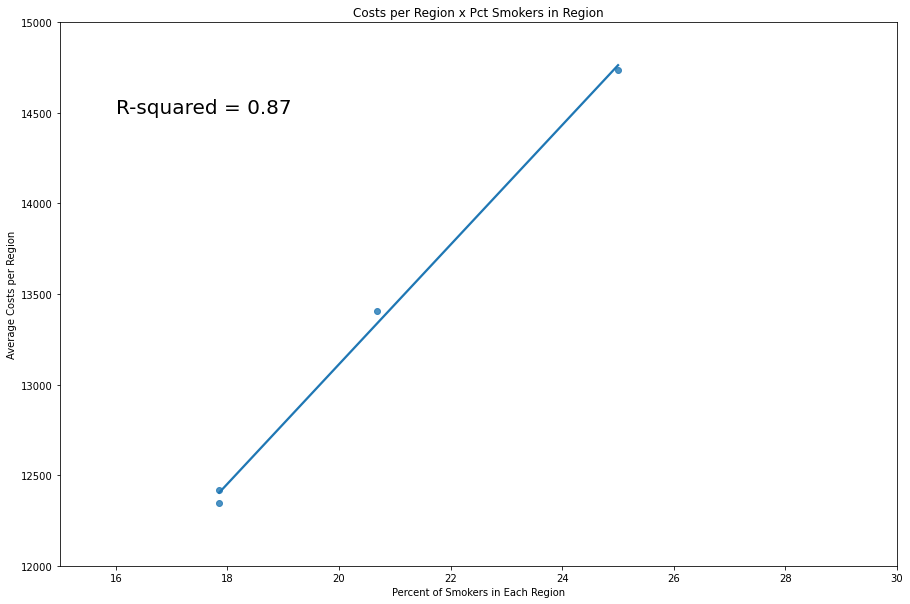

In [57]:
plt.figure(figsize=(15,10))
plt.text(16,14500,'R-squared = '+str(smkrScore), size=20) #HOW TO GET A R2 at a Point
sns.regplot(x=output[0], y=output[1], ci=None)
plt.xlim((15, 30))
plt.ylim((12000, 15000))
plt.title('Costs per Region x Pct Smokers in Region')
plt.xlabel('Percent of Smokers in Each Region')
plt.ylabel('Average Costs per Region')
plt.show()

And now let's go back to our "middle group"

In [58]:
questionable = insurance3[insurance3.question == 1]

In [59]:
questionable.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,question,linear_pred,linear_resid,rfr_resid,rfr_pred
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,223.000000
mean,38.538117,0.497758,27.903901,5027.565022,1.183857,0.560538,1.340807,21365.936958,0.668161,1.0,20760.291127,605.645830,2793.002302,18572.934655
std,13.963825,0.501120,5.121089,2261.559494,1.218221,0.497438,1.090703,5142.193061,0.471933,0.0,11426.857325,11917.213045,5226.462097,5929.727523
min,18.000000,0.000000,17.195000,3000.000000,0.000000,0.000000,0.000000,10795.937330,0.000000,1.0,-158.527171,-11342.850195,-6344.400197,1300.432983
25%,26.500000,0.000000,24.420000,3008.000000,0.000000,0.000000,0.000000,17891.713865,0.000000,1.0,10053.325628,-9804.133511,-444.487038,15543.999702
50%,39.000000,0.000000,27.500000,4005.000000,1.000000,1.000000,1.000000,20773.627750,1.000000,1.0,25244.269917,-8240.569709,383.504332,18773.267703
75%,50.000000,1.000000,29.962500,8003.000000,2.000000,1.000000,2.000000,24770.750070,1.000000,1.0,30715.883168,12499.006699,4906.124093,22766.471689
max,64.000000,1.000000,42.460000,10010.000000,5.000000,1.000000,3.000000,36910.608030,1.000000,1.0,38412.542864,24493.413886,23439.434685,30499.308076


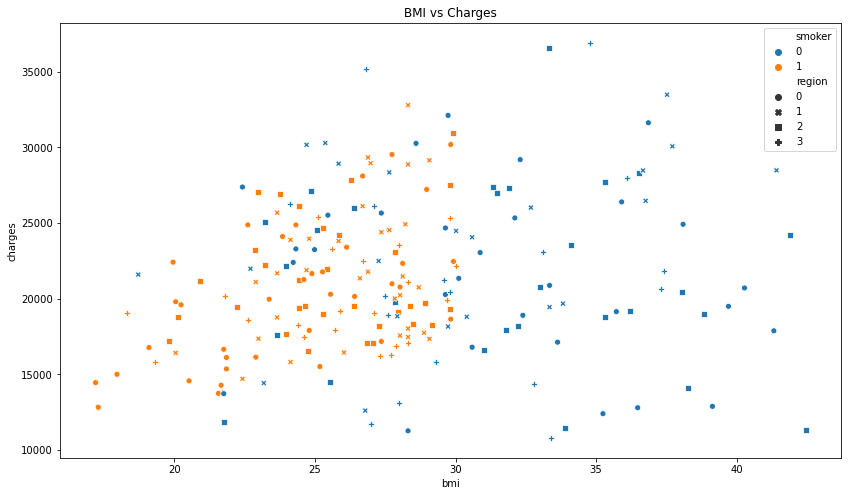

In [60]:
plt.figure(figsize = (14,8))
sns.scatterplot(x='bmi', y='charges', data=questionable, hue=insurance3.smoker, style=insurance3.region)
plt.title('BMI vs Charges')
plt.show()

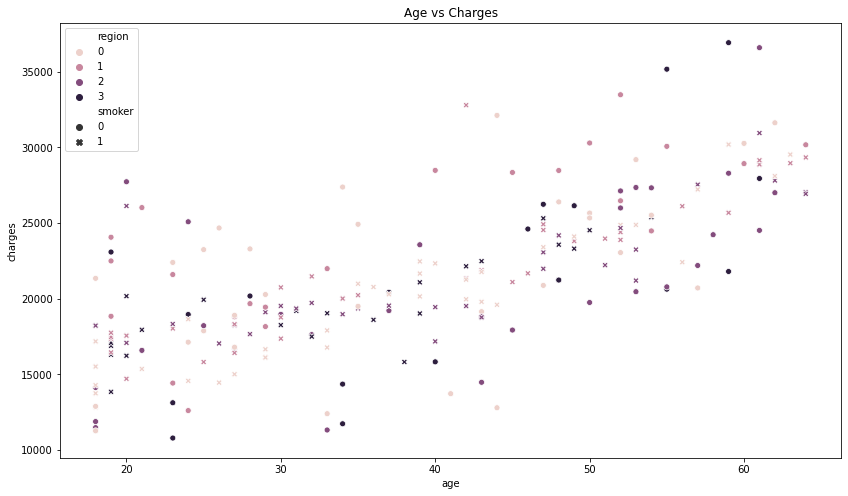

In [61]:
sns.color_palette("tab10")
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=questionable, hue=insurance3.region, style=insurance3.smoker)
plt.title('Age vs Charges')
plt.show()

And lastly, let's generate the correlation matrix for our slides using our final features

In [62]:
model_features2 = model_features + ['charges']

In [63]:
insN = insurance3[model_features2] 

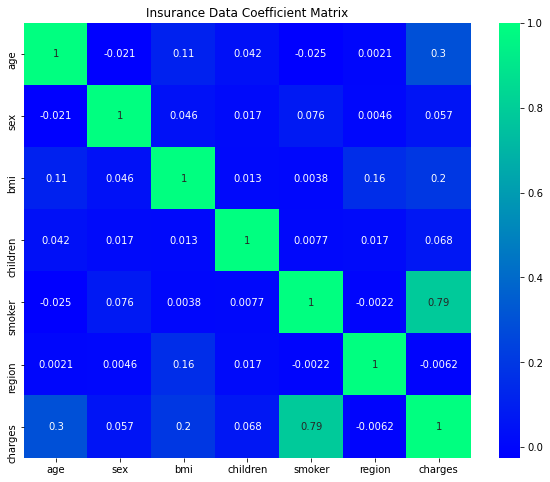

In [64]:
insNCoeffMatrix = insN.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(data=insNCoeffMatrix, cmap='winter', annot=True)
plt.title('Insurance Data Coefficient Matrix')
plt.show()

Okay, well! Smoking heavily affects insurance charges and is a co-factor with BMI

In [65]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
insurance3Copy = insurance3.copy(deep=True)
insurance3Copy[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim', 'steps']] = min_max_scaler.fit_transform(insurance3Copy[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim', 'steps']])
insurance3Copy

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,question,linear_pred,linear_resid,rfr_resid,rfr_pred
0,0.021739,0.0,0.321227,0.001284,0.0,1.0,1.000000,0.251611,1.0,1,25111.241864,-8226.317864,-263.467807,17148.391807
1,0.000000,1.0,0.479150,0.001141,0.2,0.0,0.666667,0.009636,1.0,0,3687.605173,-1962.052873,-852.000496,2577.552796
2,0.217391,1.0,0.458434,0.001284,0.6,0.0,0.666667,0.053115,0.0,0,6963.145707,-2513.683707,-651.741472,5101.203472
3,0.326087,1.0,0.181464,0.999857,0.0,0.0,0.333333,0.333010,0.0,1,3741.308405,18243.162205,5366.818738,16617.651872
4,0.304348,1.0,0.347592,0.714693,0.0,0.0,0.333333,0.043816,1.0,0,5537.640897,-1670.785697,-230.682202,4097.537402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.143795,0.6,0.0,0.333333,0.151299,0.0,0,12302.006002,-1701.457702,-2083.312580,12683.860880
1334,0.000000,0.0,0.429379,0.000428,0.0,0.0,0.000000,0.017305,1.0,0,3431.371647,-1225.390847,-82.671661,2288.652461
1335,0.000000,0.0,0.562012,0.001141,0.0,0.0,0.666667,0.008108,1.0,0,4363.662366,-2733.828866,-351.621308,1981.454808
1336,0.065217,0.0,0.264730,0.714551,0.0,0.0,1.000000,0.014144,0.0,0,1106.986613,900.958387,-496.953074,2504.898074


In [66]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [67]:
dlX = insurance3Copy[features]
dly = insurance3Copy['charges']
dltrain_x,dlval_x,dltrain_y,dlval_y=train_test_split(dlX,dly,train_size=0.8,test_size=0.2)

In [68]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

kerasModel = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=[6]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

Minimum Validation Loss: 0.0048


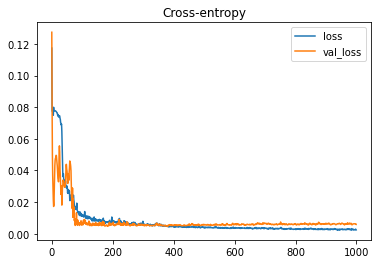

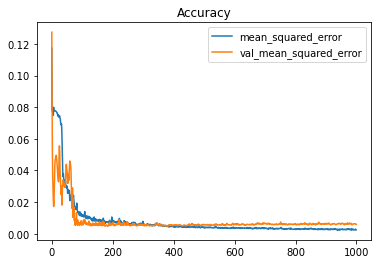

In [69]:
kerasModel.compile(
    optimizer='adam',
    loss='mse',
    metrics=['MeanSquaredError'],
)

history = kerasModel.fit(
    dltrain_x, dltrain_y,
    validation_data=(dlval_x, dlval_y),
    batch_size=256,
    epochs=1000,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot(title="Accuracy")
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [70]:
scores = kerasModel.evaluate(dlval_x, dlval_y, verbose=0)
print("%s: %.2f%%" % (kerasModel.metrics_names[1], scores[1]*100))

mean_squared_error: 0.59%
